<a href="https://colab.research.google.com/github/solivagvs/stat554hw04/blob/main/hw04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Bryan Sandor

Title: HW04

# Summarizing Student Data Graphically

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Homework 3 (copy)

__Summarizing Data Numerically__

### Task 1: Read in the Data

First we read in the set of data and then examine a few observations. I use the `.tail()` method to easily see the total number of observations.

In [ ]:
students = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt", \
sep=";")

students.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


### Task 2: Summarize the Data

#### Categorical Analysis

- The following is a one-way contingency table on the variable `famsize`. The information for the data set states this variable denotes "Family Size" and is categorical and binary, being either `LE3` ("less than or equal to $3$") or `GT3` ("greater than $3$").

In [ ]:
famsizect = students.famsize.value_counts() # count the number of occurrences for each category and store to famsizect -> family size count

print(famsizect)

famsize
GT3    281
LE3    114
Name: count, dtype: int64


> At $281$, the proportion of families with more than $3$ members, $\frac{281}{395} \approx 71\%$ is more than double that of families with $3$ or fewer members, $\frac{114}{395} \approx 29\%$.

- The following is a two-way contigency table on the variables `famsize` and `Pstatus`, with the former already addressed and the latter a binary categorical variable describing whether the parents live together (`T`) or apart (`A`).

In [ ]:
pd.crosstab(
    students.famsize,
    students.Pstatus,
    margins = True     # includes totals for rows/columns
)

Pstatus,A,T,All
famsize,,,
GT3,21,260,281
LE3,20,94,114
All,41,354,395


> $260$ students come from households with more than $3$ members whose parents live together. This represents the largest proportion for these two groups.

- The following is a three-way contigency table between `famsize`, `Pstatus`, and `famsup`, the last of which is a boolean type describing whether a student receives family education support.

In [ ]:
famtable = pd.crosstab(
    [students.famsize, students.Pstatus],
    students.famsup,
    rownames = ["Family Size", "Parental Status"],
    colnames = ["Family Support"],
    margins = True
)

famtable

Family Support                no  yes  All
Family Size Parental Status               
GT3         A                  8   13   21
            T                 91  169  260
LE3         A                  9   11   20
            T                 45   49   94
All                          153  242  395

> This table appears to indicate, in particular for the $169$, that overall a student seems more likely to receive family support if their family is "large" and the parents live together.

- The following is a conditional two-way table subset from our previous table examining just those students who receive family support.

In [ ]:
famtable.columns
famtable.index

MultiIndex([('GT3', 'A'),
            ('GT3', 'T'),
            ('LE3', 'A'),
            ('LE3', 'T'),
            ('All',  '')],
           names=['Family Size', 'Parental Status'])

In [ ]:
famtable["yes"]

Family Size  Parental Status
GT3          A                   13
             T                  169
LE3          A                   11
             T                   49
All                             242
Name: yes, dtype: int64

- Finally, we create one more conditional two-way table by subsetting the table to examine just those students in "large" families (more than $3$ members).

In [ ]:
famtable.loc[("GT3", ("A", "T")), :]

Family Support               no  yes  All
Family Size Parental Status              
GT3         A                 8   13   21
            T                91  169  260

#### Numerical Analysis

The five quantitative variables being `age`, `absences`, `G1`, `G2`, and `G3`, we may compute measures of center and spread for them.

- Measures of center and spread for `age`, `absences`, and `G3`:

In [ ]:
print("Mean age is", students.age.mean())
print("Median age is", students.age.median())
print("Standard deviation of age is", students.age.std())
print("Given quantile of age and corresponding values are \n", students.age.quantile([0.01, 0.05, 0.25, 0.75, 0.95, 0.99]))

Mean age is 16.696202531645568
Median age is 17.0
Standard deviation of age is 1.2760427246056245
Given quantile of age and corresponding values are 
 0.01    15.0
0.05    15.0
0.25    16.0
0.75    18.0
0.95    19.0
0.99    20.0
Name: age, dtype: float64


In [ ]:
print("Mean absences is", students.absences.mean())
print("Median absences is", students.absences.median())
print("Standard deviation of absences is", students.absences.std())
print("Given quantile of absences and corresponding values are \n", \
      students.absences.quantile([0.01, 0.05, 0.25, 0.75, 0.95, 0.99]))

Mean absences is 5.708860759493671
Median absences is 4.0
Standard deviation of absences is 8.003095687108177
Given quantile of absences and corresponding values are 
 0.01     0.00
0.05     0.00
0.25     0.00
0.75     8.00
0.95    18.30
0.99    38.12
Name: absences, dtype: float64


In [ ]:
print("Mean G3 score is", students.G3.mean())
print("Median G3 score is", students.G3.median())
print("Standard deviation of G3 score is", students.G3.std())
print("Given quantile of G3 score and corresponding values are \n", students.G3.quantile([0.01, 0.05, 0.25, 0.75, 0.95, 0.99]))

Mean G3 score is 10.415189873417722
Median G3 score is 11.0
Standard deviation of G3 score is 4.5814426109978434
Given quantile of G3 score and corresponding values are 
 0.01     0.0
0.05     0.0
0.25     8.0
0.75    14.0
0.95    17.0
0.99    19.0
Name: G3, dtype: float64


- We repeat the process, this time subsetting the data by large families (those greater than $3$ members) using the grouping variable `GT3`

In [ ]:
print("The mean age of students with family size greater than 3 is",\
      students.loc[students["famsize"] == "GT3"].G3.mean())
print("The median age of students with family size greater than 3 is",\
      students.loc[students["famsize"] == "GT3"].G3.median())
print(
    "The standard deviation of age of students with family size greater than 3 is",\
      students.loc[students["famsize"] == "GT3"].G3.std()
      )
print("Given quantile and and corresponding values for age of students with family size greater than 3 are \n", \
      students.loc[students["famsize"] == "GT3"].\
      G3.quantile([0.01, 0.05, 0.25, 0.75, 0.95, 0.99])
      )

The mean age of students with family size greater than 3 is 10.177935943060499
The median age of students with family size greater than 3 is 11.0
The standard deviation of age of students with family size greater than 3 is 4.704520319728594
Given quantile and and corresponding values for age of students with family size greater than 3 are 
 0.01     0.0
0.05     0.0
0.25     8.0
0.75    14.0
0.95    17.0
0.99    18.0
Name: G3, dtype: float64


In [ ]:
print("The mean absences of students with family size greater than 3 is",\
      students.loc[students["famsize"] == "GT3"].absences.mean())
print("The median absences of students with family size greater than 3 is",\
      students.loc[students["famsize"] == "GT3"].absences.median())
print(
    "The standard deviation of absences of students with family size greater than 3 is",\
      students.loc[students["famsize"] == "GT3"].absences.std()
      )
print("Given quantile and and corresponding values for absences of students with family size greater than 3 are \n", \
      students.loc[students["famsize"] == "GT3"].\
      absences.quantile([0.01, 0.05, 0.25, 0.75, 0.95, 0.99])
      )

The mean absences of students with family size greater than 3 is 5.526690391459074
The median absences of students with family size greater than 3 is 4.0
The standard deviation of absences of students with family size greater than 3 is 8.154326157249296
Given quantile and and corresponding values for absences of students with family size greater than 3 are 
 0.01     0.0
0.05     0.0
0.25     0.0
0.75     7.0
0.95    20.0
0.99    38.4
Name: absences, dtype: float64


In [ ]:
print("The mean G3 score of students with family size greater than 3 is",\
      students.loc[students["famsize"] == "GT3"].G3.mean())
print("The median G3 score of students with family size greater than 3 is",\
      students.loc[students["famsize"] == "GT3"].age.median())
print(
    "The standard deviation of G3 score of students with family size greater than 3 is",\
      students.loc[students["famsize"] == "GT3"].age.std()
      )
print("Given quantile and and corresponding values for G3 score of students with family size greater than 3 are \n", \
      students.loc[students["famsize"] == "GT3"].\
      age.quantile([0.01, 0.05, 0.25, 0.75, 0.95, 0.99])
      )

The mean G3 score of students with family size greater than 3 is 10.177935943060499
The median G3 score of students with family size greater than 3 is 17.0
The standard deviation of G3 score of students with family size greater than 3 is 1.2991139289948304
Given quantile and and corresponding values for G3 score of students with family size greater than 3 are 
 0.01    15.0
0.05    15.0
0.25    16.0
0.75    18.0
0.95    19.0
0.99    20.0
Name: age, dtype: float64


- We modify the previous process utilizing the `groupby` method and comparing the same variables across both small families (less than or equal to $3$ members) large families (greater than $3$).

In [ ]:
students.groupby("famsize")[["age", "absences", "G3"]].mean()

,age,absences,G3
famsize,,,
GT3,16.66548,5.526690,10.177936
LE3,16.77193,6.157895,11.000000


In [ ]:
students.groupby("famsize")[["age", "absences", "G3"]].median()

,age,absences,G3
famsize,,,
GT3,17.0,4.0,11.0
LE3,17.0,4.0,11.0


In [ ]:
students.groupby("famsize")[["age", "absences", "G3"]].std()

,age,absences,G3
famsize,,,
GT3,1.299114,8.154326,4.704520
LE3,1.219568,7.633854,4.225921


In [ ]:
students.groupby("famsize")[["age", "absences", "G3"]].quantile([0.01, 0.05, 0.25, 0.95, 0.99])

age  absences     G3
famsize                            
GT3     0.01  15.0      0.00   0.00
        0.05  15.0      0.00   0.00
        0.25  16.0      0.00   8.00
        0.95  19.0     20.00  17.00
        0.99  20.0     38.40  18.00
LE3     0.01  15.0      0.00   0.00
        0.05  15.0      0.00   0.00
        0.25  16.0      0.25   9.00
        0.95  19.0     18.00  17.35
        0.99  19.0     29.35  19.00

- We repeat the previous process across two grouping variables, this time `familysize` and `Pstatus`.

In [ ]:
students \
    .groupby(["famsize", "Pstatus"]) \
     [["age", "absences", "G3"]] \
     .mean()

age  absences         G3
famsize Pstatus                                
GT3     A        16.571429  9.142857  10.714286
        T        16.673077  5.234615  10.134615
LE3     A        16.600000  8.600000  11.700000
        T        16.808511  5.638298  10.851064

In [ ]:
students \
    .groupby(["famsize", "Pstatus"]) \
     [["age", "absences", "G3"]] \
     .median()

age  absences    G3
famsize Pstatus                      
GT3     A        16.0       6.0  11.0
        T        17.0       3.0  11.0
LE3     A        16.5       7.0  11.0
        T        17.0       4.0  11.0

In [ ]:
students \
    .groupby(["famsize", "Pstatus"]) \
     [["age", "absences", "G3"]] \
     .std()

age   absences        G3
famsize Pstatus                               
GT3     A        1.362770  16.242801  4.951190
        T        1.296284   7.096872  4.691358
LE3     A        1.535544   7.802833  3.525844
        T        1.147944   7.537506  4.362493

In [ ]:
students \
    .groupby(["famsize", "Pstatus"]) \
     [["age", "absences", "G3"]] \
     .quantile([0.01, 0.05, 0.25, 0.75, 0.95, 0.99])

age  absences     G3
famsize Pstatus                             
GT3     A       0.01  15.00      0.00   0.00
                0.05  15.00      0.00   0.00
                0.25  16.00      0.00   9.00
                0.75  17.00     10.00  14.00
                0.95  19.00     23.00  18.00
                0.99  19.80     64.60  18.00
        T       0.01  15.00      0.00   0.00
                0.05  15.00      0.00   0.00
                0.25  16.00      0.00   8.00
                0.75  18.00      7.00  13.25
                0.95  19.00     18.10  17.00
                0.99  19.41     32.10  18.00
LE3     A       0.01  15.00      0.00   6.19
                0.05  15.00      0.00   6.95
                0.25  15.00      2.00  10.00
                0.75  18.00     12.25  13.00
                0.95  19.05     19.55  19.00
                0.99  19.81     27.91  19.00
        T       0.01  15.00      0.00   0.00
                0.05  15.00      0.00   0.00
                0.25  16.00      0.00   9.00
                0.75  18.00      8.00  14.00
                0.95  18.35     15.40  16.35
                0.99  19.00     27.17  19.00

- Finally, we create a correlation matrix between all the numeric variables.

In [ ]:
students[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


> Final remark: The notes for the data state a strong correlation exists between `G1` and `G2` with `G3` because `G3` is the final year grade (issued at the third period), while `G1` and `G2` correspond to the first and second periods, respectively.

## Task 1

### Categorical Variables

We create stacked and side-by-side bar graphs for the categorical data used previously, family size ("GT3" - greater than 3 and "LE3" - less than or equal to 3) and parental status ("T" - together or "A" - Apart).

<Axes: title={'center': 'Family Size vs Parental Status'}, xlabel='Family Size', ylabel='Count'>

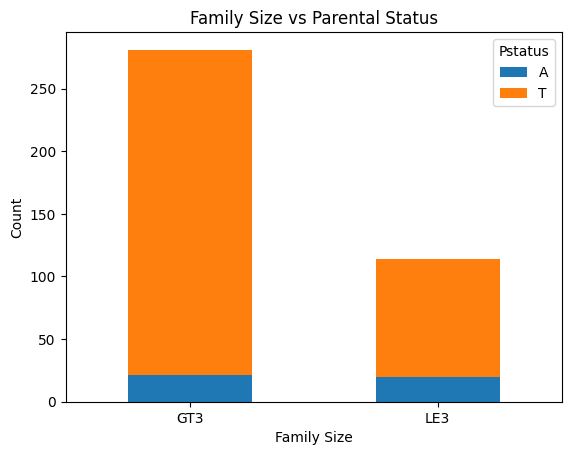

In [ ]:
hw04famtable = pd.crosstab(
    students.famsize,
    students.Pstatus,
)

hw04famtable.plot(
    kind = "bar",
    stacked = True,
    title = "Family Size vs Parental Status",
    xlabel = "Family Size",
    ylabel = "Count",
    rot = 0
)

<Axes: title={'center': 'Family Size vs Parental Status'}, xlabel='Family Size', ylabel='Count'>

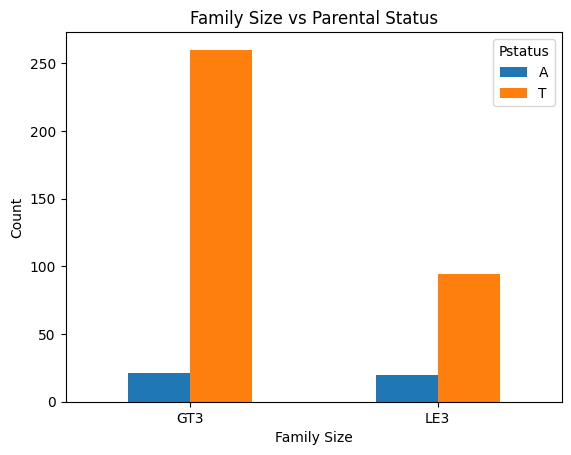

In [ ]:
hw04famtable.plot(
    kind = "bar",
    stacked = False,
    title = "Family Size vs Parental Status",
    xlabel = "Family Size",
    ylabel = "Count",
    rot = 0
)

It would appear that family size and parental status are correlated, with a larger family size typical of a pair of parents who live together.

### Numeric Variables

#### Family Size and Age

To plot histograms of the ages across the two categories for family size, `GT3` or `LE3`, we split the data across the two categories.

In [ ]:
largeFams = students.loc[students.famsize == "GT3"]
smallFams = students.loc[students.famsize == "LE3"]

largeFamsAge = largeFams.age
smallFamsAge = smallFams.age

print(len(largeFamsAge), len(smallFamsAge), abs(len(largeFamsAge) - len(smallFamsAge)))
# Finds the length of each list and their difference

281 114 167


Since the `smallfams` category has fewer observations, we append `NaN`s to the end of the shorter list's `age` variable.

In [ ]:
smallFamsAge = pd.concat([smallFamsAge, pd.Series([np.nan for _ in range(167)])])

Finally, we merge the two categories together in a data frame and print their co-histogram.

[Text(0.5, 0, 'Age')]

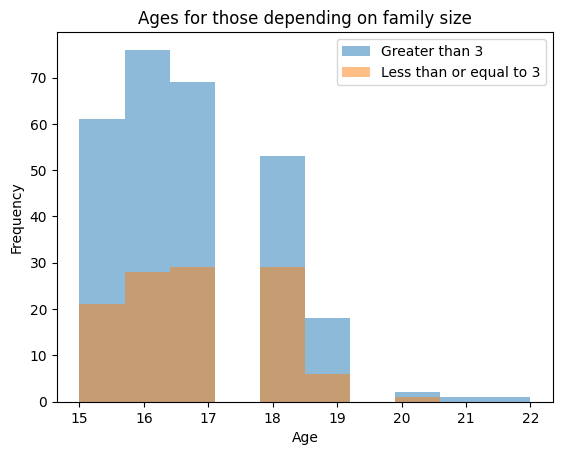

In [ ]:
familySizeAge = pd.DataFrame(
                    zip(largeFamsAge, smallFamsAge),
                    columns = ["Greater than 3", "Less than or equal to 3"])

familySizeAge.plot.hist(
    alpha = 0.5,
    title = "Ages for those depending on family size") \
    .set(xlabel = "Age")

It appears those with a larger family have more members who are "older" than average, however it appears the mean ages for both categories are approximately equal.

Now we examine a density plot for the same set of data.

<Axes: title={'center': 'Ages for those depending on family size'}, ylabel='Density'>

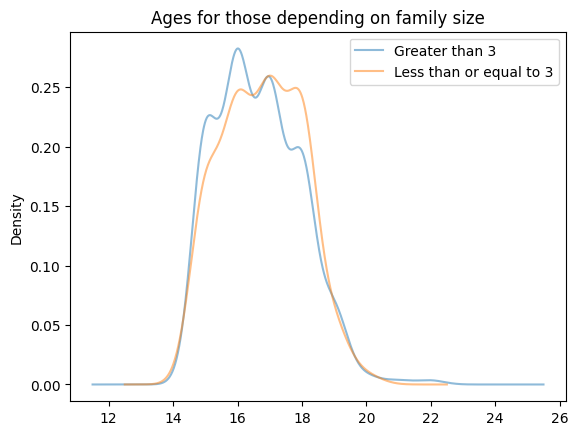

In [ ]:
familySizeAge.plot(
    kind = "density",
    xlabel = "Age",
    title = "Ages for those depending on family size",
    alpha = 0.5
)

This density plot implies the two distributions are approximately the same.

Now we plot the boxplot.

<Axes: title={'center': 'age'}, xlabel='Age'>

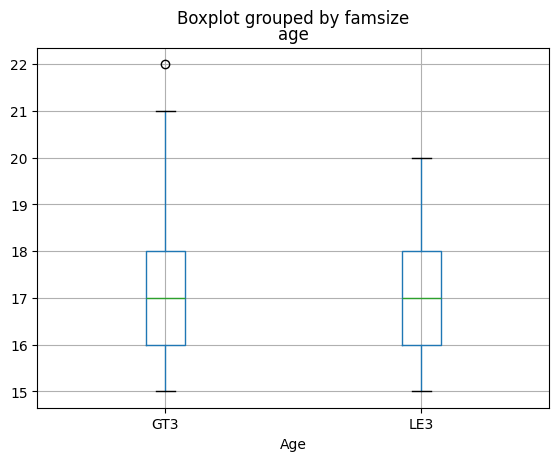

In [ ]:
students.boxplot(
    column = ["age"],
    by = "famsize",
    xlabel = "Age"
)

While the two distributions are approximately the same, the boxplot indicates the presence of an outlier, which does agree with the slight right-skewness of the ages for those from a "large" family.

#### Family Size and G3

Now we will repeat similar analyses using the same category on the `G3` numeric variable. So first we must correctly format the data.

In [ ]:
largeFamsG3 = largeFams.G3
smallFamsG3 = smallFams.G3

smallFamsG3 = pd.concat([smallFamsG3, pd.Series([np.nan for _ in range(167)])])

familySizeG3 = pd.DataFrame(
                    zip(largeFamsG3, smallFamsG3),
                    columns = ["Greater than 3", "Less than or equal to 3"])

familySizeG3

,Greater than 3,Less than or equal to 3
0,6,10.0
1,6,15.0
2,15,11.0
3,10,19.0
4,6,14.0
...,...,...
276,10,NaN
277,6,NaN
278,0,NaN
279,0,NaN


We plot overlayed histograms via a different method than before.

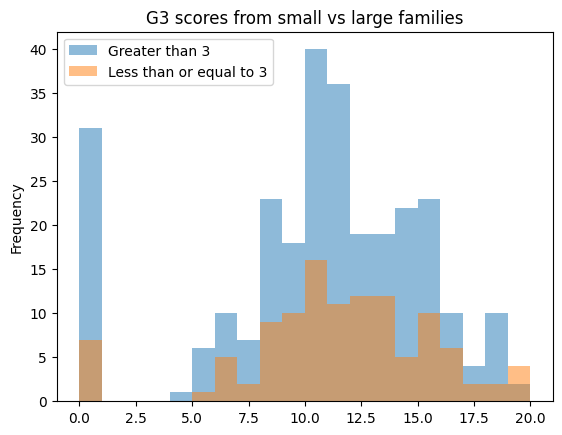

In [ ]:
numBins = 20 # Since the data ranges from 0 to 20, create one bin per score
bins = [i*max(largeFamsG3)/numBins for i in range(0, numBins + 1)]
# creates intervals for the bins using the numBins argument

largeFamsG3.plot.hist(
    bins = bins,
    alpha = 0.5,
    label = "Greater than 3",
    title = "G3 scores from small vs large families") \
                   .set(xlabel = "G3 Score")

smallFamsG3.plot.hist(
    bins = bins,
    alpha = 0.5,
    label = "Less than or equal to 3")

plt.legend()

The two categories have similar means and spreads. Notable is the "spike" in scores at the minimum portion of the histogram.

Now we examine different distribution plots _just on the category_ `GT3`.

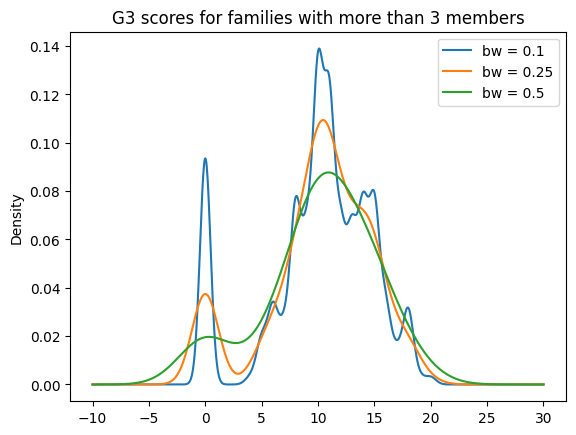

In [ ]:
largeFamsG3.plot.density(
    bw_method = 0.1,
    label = "bw = 0.1",
    title = "G3 scores for families with more than 3 members")

largeFamsG3.plot.density(
    bw_method = 0.25,
    label = "bw = 0.25")

largeFamsG3.plot.density(
    bw_method = 0.5,
    label = "bw = 0.5")

plt.legend()

The effect of the "spike" at the lowest possible score is evident from the density curve.

Finally we compare the `G3` scores by family size in boxplots.

Text(0.5, 1.0, 'Boxplots of G3 scores by family size')

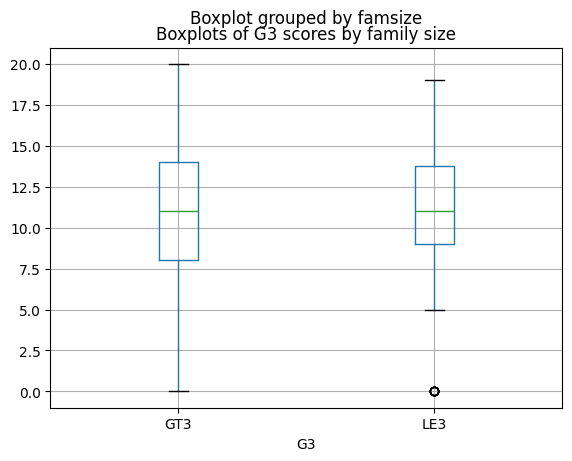

In [ ]:
students.boxplot(
    column = ["G3"],
    by = "famsize",
    xlabel = "G3",
)

plt.title("Boxplots of G3 scores by family size")

These boxplots suggest the zero-score observations are significant enought to be suggest outliers in the "small" family category, but not the "large" family category.

#### Scatterplots for `G3`

First we compare `G3` scores to number of absences.

In [ ]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<Axes: title={'center': 'Scatterplot of absences vs G3 scores categorized by family size'}, xlabel='absences', ylabel='G3'>

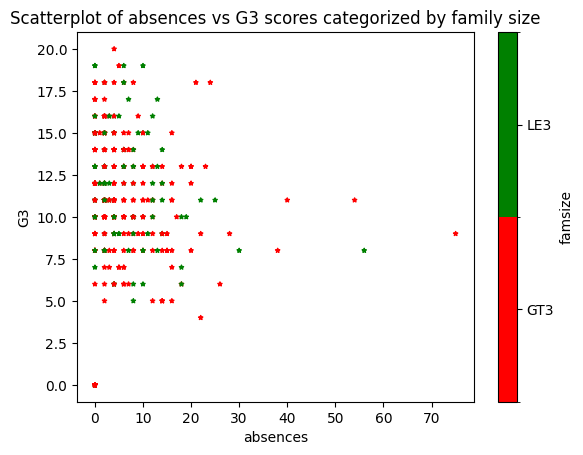

In [ ]:
from matplotlib.colors import ListedColormap
students["famsize"] = students.famsize.astype("category")

students.plot.scatter(
    x = "absences",
    y = "G3",
    c = "famsize",
    marker = "*",
    s = 10,
    cmap = ListedColormap(["red", "green"]), # customizable color option
    title = "Scatterplot of absences vs G3 scores categorized by family size"
)

The scatterplot is a little difficult to read, likely because the values are all positive integers. It does seem to suggest there is no apparent correlation between the  number of absences and the `G3` score.

Our last scatterplot will compare `G3` scores with `age`, categorized again by family size.

<Axes: title={'center': 'Scatterplot of age vs G3 scores categorized by family size'}, xlabel='age', ylabel='G3'>

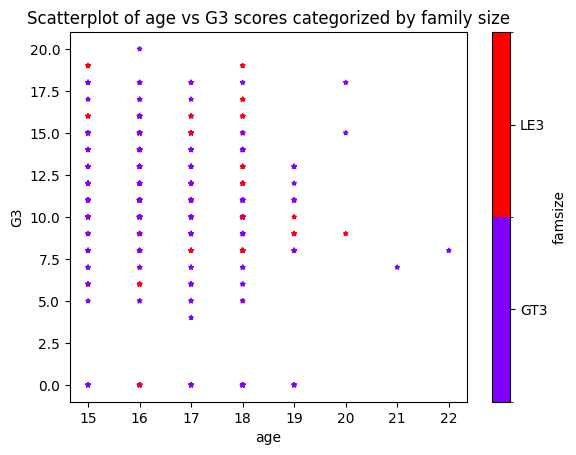

In [ ]:
students.plot.scatter(
    x = "age",
    y = "G3",
    c = "famsize",
    marker = "*",
    s = 10,
    cmap = "rainbow",
    title = "Scatterplot of age vs G3 scores categorized by family size"
)

Again since the data are discrete it makes the scatterplot look "chunky." It also suggests little to no correlation between `age` and `G3` score.

# NFL Data

## Task 1: Read in the Data

We begin by importing the data and converting several variables to `category` type.

In [ ]:
nfl_data = pd.read_csv(
    "https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv"
    )

nfl_data["homeTeam"] = nfl_data.homeTeam.astype("category")
nfl_data["awayTeam"] = nfl_data.awayTeam.astype("category")
nfl_data["day"] = nfl_data.day.astype("category")
nfl_data["stadium"] = nfl_data.stadium.astype("category")
nfl_data["startTime"] = nfl_data.startTime.astype("category")
nfl_data["toss"] = nfl_data.toss.astype("category")
nfl_data["roof"] = nfl_data.roof.astype("category")
nfl_data["surface"] = nfl_data.surface.astype("category")

## Task 2: Summarize the Data

Now we remove any games that did not occur during the regular season. They are labeled in the `week` column as `WildCard`, `Division`, `ConfChamp`, or `SuperBowl`.

In [ ]:
for i in range(len(nfl_data)):
    if (nfl_data.week[i] == "WildCard") or (nfl_data.week[i] == "Division") or (nfl_data.week[i] == "ConfChamp") or (nfl_data.week[i] == "SuperBowl"):
        nfl_data.drop(i, inplace = True) # inplace updates dataframe actively

In [ ]:
nfl_data["week"] = pd.to_numeric(nfl_data["week"]) # allows numeric sorting of the weeks instead of lexicographic, e.g., 1, 2, 3, vs 1, 11, 2

Now we examine some basic statistics for the Away/Home final scores grouped first by `season` and `week`, then just `season`, and finally `week`.

In [ ]:
nfl_data.groupby(["season", "week"])[["AFinal", "HFinal"]].describe()

AFinal                                                        \
             count       mean        std   min    25%   50%    75%   max   
season week                                                                
2002   1      16.0  23.125000   9.680737   7.0  16.00  23.0  29.50  40.0   
       2      16.0  22.687500  12.354318   3.0  13.75  23.5  27.00  45.0   
       3      14.0  19.571429  11.765100   3.0  10.75  22.0  27.50  38.0   
       4      14.0  18.928571   8.939663   3.0  13.25  19.0  24.50  35.0   
       5      14.0  24.000000  10.355229   9.0  17.00  23.0  29.00  49.0   
...            ...        ...        ...   ...    ...   ...    ...   ...   
2014   13     16.0  20.687500   9.470788   0.0  15.50  20.0  27.50  35.0   
       14     16.0  27.062500   9.698582  13.0  21.50  24.5  36.25  42.0   
       15     16.0  18.000000   8.899438   7.0  12.75  13.5  23.25  38.0   
       16     16.0  22.875000  10.052363   7.0  13.00  22.0  31.25  38.0   
       17     16.0  20.812500  11.438058   6.0  13.00  17.0  28.75  44.0   

            HFinal                                                       
             count       mean        std  min    25%   50%    75%   max  
season week                                                              
2002   1      16.0  26.125000  11.050641  6.0  19.75  27.0  31.00  49.0  
       2      16.0  18.187500  10.387292  0.0  13.00  16.5  21.75  39.0  
       3      14.0  24.428571  11.460395  3.0  16.25  27.0  30.00  44.0  
       4      14.0  28.285714  14.187907  7.0  18.00  27.0  34.75  52.0  
       5      14.0  23.214286   8.441460  6.0  18.00  25.5  28.00  37.0  
...            ...        ...        ...  ...    ...   ...    ...   ...  
2014   13     16.0  27.312500  14.012940  3.0  15.25  27.5  33.25  52.0  
       14     16.0  19.750000  10.908712  0.0  13.00  19.0  25.00  43.0  
       15     16.0  18.437500   9.750000  0.0  14.00  18.0  21.75  41.0  
       16     16.0  22.937500  11.227756  3.0  15.50  23.0  29.00  42.0  
       17     16.0  20.500000  10.013324  3.0  16.00  20.0  24.50  47.0  

[221 rows x 16 columns]

While this gives the most organized view, I find this difficult to digest at face-value for the sheer number of different rows. I think this would make it much easier to compare scores between specific season/weeks.

In [ ]:
nfl_data.groupby("season")[["AFinal", "HFinal"]].describe()

AFinal                                                     HFinal  \
        count       mean        std  min   25%   50%    75%   max  count   
season                                                                     
2002    256.0  20.550781  10.064759  0.0  13.0  20.5  27.00  49.0  256.0   
2003    256.0  19.054688  10.251970  0.0  13.0  19.0  24.25  55.0  256.0   
2004    256.0  20.230469  10.175596  0.0  13.0  19.0  27.00  49.0  256.0   
2005    256.0  18.792969   9.948894  0.0  10.0  19.0  24.00  45.0  256.0   
2006    256.0  20.234375  10.386254  0.0  13.0  21.0  27.00  49.0  256.0   
2007    256.0  20.253906  10.703215  0.0  13.0  20.0  28.00  56.0  256.0   
2008    256.0  20.750000  10.420944  0.0  13.0  20.0  27.00  54.0  256.0   
2009    256.0  20.363281  10.672526  0.0  13.0  20.0  27.00  48.0  256.0   
2010    256.0  21.089844  10.288187  0.0  14.0  20.0  27.25  59.0  256.0   
2011    256.0  20.546875   9.634789  0.0  14.0  20.0  27.00  45.0  256.0   
2012    256.0  21.539062  10.404676  0.0  13.0  21.5  27.25  52.0  256.0   
2013    256.0  21.855469   9.664500  0.0  16.0  21.0  27.00  56.0  256.0   
2014    256.0  21.343750   9.877634  0.0  14.0  21.0  27.00  48.0  256.0   

                                                             
             mean        std  min    25%   50%    75%   max  
season                                                       
2002    22.796875  10.182152  0.0  16.00  23.0  30.00  52.0  
2003    22.609375  10.119470  0.0  16.00  23.0  28.00  50.0  
2004    22.738281  10.400502  0.0  15.75  23.0  30.00  58.0  
2005    22.441406   9.797383  0.0  16.00  21.0  28.00  52.0  
2006    21.082031   9.856475  0.0  14.00  20.0  27.00  48.0  
2007    23.121094  10.568033  3.0  16.00  22.0  31.00  56.0  
2008    23.308594  10.454499  0.0  16.00  24.0  31.00  56.0  
2009    22.570312  10.666557  0.0  16.00  23.0  30.00  59.0  
2010    22.984375  10.251339  0.0  14.00  23.0  31.00  49.0  
2011    23.812500  10.524109  0.0  17.00  23.0  30.25  62.0  
2012    23.972656  10.559413  0.0  17.00  23.0  31.00  59.0  
2013    24.960938  10.533534  0.0  19.00  24.0  31.00  55.0  
2014    23.832031  10.954053  0.0  17.00  23.0  30.25  56.0

This is much easier to "consume" and I find it interested how "stable" a lot of the values seem to be across years, an application of the law of large numbers.

In [ ]:
nfl_data.groupby("week")[["AFinal", "HFinal"]].describe()

AFinal                                                      HFinal  \
      count       mean        std  min    25%   50%    75%   max  count   
week                                                                      
1     208.0  19.716346   8.977768  0.0  13.00  20.0  26.00  41.0  208.0   
2     207.0  19.545894  10.433170  0.0  10.00  20.0  27.00  48.0  207.0   
3     198.0  20.767677   9.634781  0.0  13.00  23.0  27.00  44.0  198.0   
4     184.0  20.983696  10.062361  0.0  14.00  20.0  27.25  55.0  184.0   
5     182.0  20.527473  10.300824  0.0  13.00  20.5  27.00  51.0  182.0   
6     181.0  20.679558  10.270079  0.0  14.00  20.0  27.00  48.0  181.0   
7     180.0  21.111111  10.674927  0.0  14.00  20.0  27.00  59.0  180.0   
8     178.0  20.151685   9.782639  0.0  13.00  20.0  27.00  45.0  178.0   
9     178.0  22.146067   9.701244  0.0  16.00  23.0  28.00  51.0  178.0   
10    186.0  21.543011  10.015705  0.0  15.25  21.0  27.00  59.0  186.0   
11    201.0  19.592040  10.017122  0.0  13.00  19.0  27.00  56.0  201.0   
12    205.0  21.507317  10.795160  0.0  13.00  21.0  28.00  54.0  205.0   
13    208.0  20.437500  10.131786  0.0  13.00  20.0  27.00  47.0  208.0   
14    208.0  19.394231  10.203171  0.0  10.00  20.0  27.00  49.0  208.0   
15    208.0  20.942308  11.224393  0.0  13.00  20.0  28.00  56.0  208.0   
16    208.0  20.802885  10.330041  0.0  13.00  20.0  28.00  44.0  208.0   
17    208.0  19.235577  10.637064  0.0  10.00  19.0  26.00  44.0  208.0   

                                                           
           mean        std  min    25%   50%    75%   max  
week                                                       
1     22.139423  10.595541  0.0  14.00  20.5  30.00  49.0  
2     22.840580   9.842384  0.0  15.50  23.0  30.00  51.0  
3     22.646465  10.153955  0.0  16.00  23.0  30.00  56.0  
4     24.092391  10.874704  0.0  16.00  23.0  31.25  56.0  
5     24.324176  10.158379  3.0  17.00  24.0  31.00  52.0  
6     22.988950   9.254422  3.0  17.00  23.0  28.00  59.0  
7     23.338889  10.948924  0.0  16.00  23.0  30.00  62.0  
8     23.359551  10.573121  0.0  16.00  23.0  30.00  52.0  
9     22.258427   9.152849  0.0  17.00  21.5  27.00  55.0  
10    22.983871  10.753491  0.0  14.00  23.0  30.00  55.0  
11    22.582090  10.326397  0.0  15.00  22.0  30.00  59.0  
12    22.878049  10.035220  0.0  17.00  21.0  28.00  58.0  
13    23.201923  10.579700  0.0  16.00  23.0  31.00  52.0  
14    24.605769  11.453682  0.0  16.00  24.0  31.00  58.0  
15    22.543269  10.288498  0.0  15.00  21.0  30.00  51.0  
16    22.168269  11.019331  0.0  14.75  21.0  28.00  55.0  
17    23.807692  10.339247  0.0  17.00  23.0  31.00  52.0

This is also easier to read than the first summary, but I think it would be more chaotic because of how different teams can be on a different season, even if the weeks are the same. However, the law of large numbers still shows stability among the statistics.

For the next, graphical part of the summaries, we look at game `duration`s. I remember as a child not enjoying football and wondering how much longer Mom and Dad would be watching a game. We will group by both `season` and `week`.

<Axes: xlabel='season,week'>

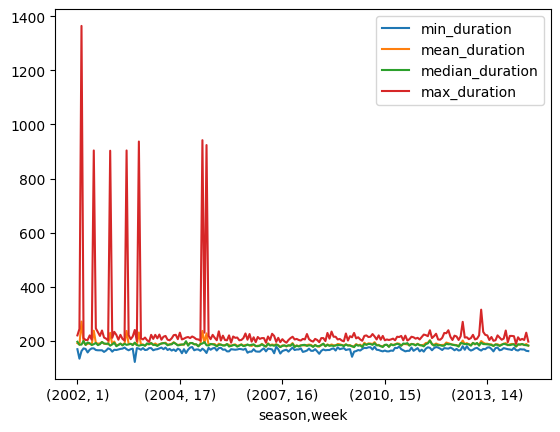

In [ ]:
summariesSeasonWeek = nfl_data.groupby(["season", "week"]).agg(
    min_duration = ("duration", "min"),
    mean_duration = ("duration", "mean"),
    median_duration = ("duration", "median"),
    max_duration = ("duration", "max")
)

summariesSeasonWeek.plot()

There appear to be several outliers, most notably the nearly 1400-minute long game. I wonder if that might be an error in recording data? Overall, the graph obeys what one would expect between the minimum, maximum, mean, and median, nameley the latter two are close together and between the former two.

For the next plot, we look at the same statistics for the away team's final score across seasons.

<Axes: xlabel='season'>

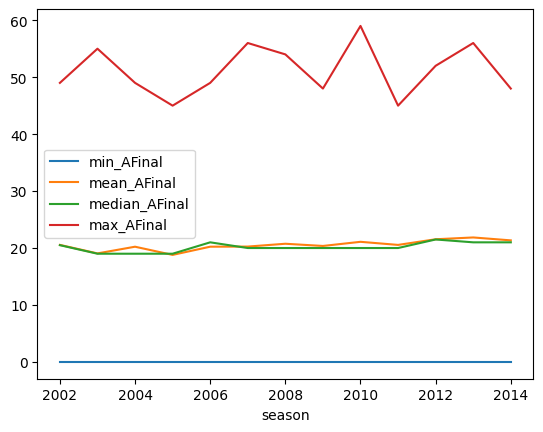

In [ ]:
summariesSeason = nfl_data.groupby("season").agg(
    min_AFinal = ("AFinal", "min"),
    mean_AFinal = ("AFinal", "mean"),
    median_AFinal = ("AFinal", "median"),
    max_AFinal = ("AFinal", "max")
)

summariesSeason.plot()

I am a little surprised to see the max appears further away from the mean and median than the min, but that's probably because there is a floor for the min (of 0) whereas there is no hypothetical ceiling for the max.

Lastly, we examine a graph, by `week`, for the home team's rushing yards.

<Axes: xlabel='week'>

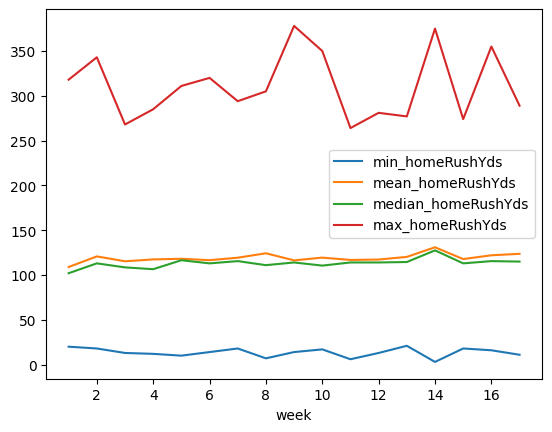

In [ ]:
summariesWeek = nfl_data.groupby("week").agg(
    min_homeRushYds = ("homeRushYds", "min"),
    mean_homeRushYds = ("homeRushYds", "mean"),
    median_homeRushYds = ("homeRushYds", "median"),
    max_homeRushYds = ("homeRushYds", "max")
)

summariesWeek.plot()

I see a similar pattern to the previous graph with the mean and median closer to the minimum, which can be no lower than 0, and the maximum, which hypothetically has no ceiling.